In [1]:
from flowerpollination import FlowerPollinationAlgorithm as FPA 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
df_main_data = pd.read_csv('EURUSDterbaru_sw_5.csv')
X = df_main_data.iloc[:,:5].values
y = df_main_data['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

df_main_data.head()

,0,1,2,3,4,target
0,1.4628,1.4754,1.4671,1.4780,1.4776,1.4860
1,1.4754,1.4671,1.4780,1.4776,1.4860,1.4860
2,1.4671,1.4780,1.4776,1.4860,1.4860,1.4798
3,1.4780,1.4776,1.4860,1.4860,1.4798,1.4829
4,1.4776,1.4860,1.4860,1.4798,1.4829,1.4647


### TASK
The 'target' feature in 'df_data' is continous values, so it will be forecasting task. The  well-known method to do forecasting is linear regression. In linear regression, we find relationship between output(dependent) variable and input(independent) variable. Based on 'df_data' the output variable, in this case 'target', depends on five inputs so it will be multiple linear regression.

In multiple linear regression, we need to find the best parameter(coefficient) that fit best to the data. The <b>B</b> are the parameter we need to find and <b>x</b> are input. In this Notebook we use FPA(Flower Pollination Algorithm) to find the optimal parameter.

![](image.png)

### Mean Absolute Error and Fitness Function
We evaluate each flower(solution) with fitness function, in fitness function we calculate the error based on MAE. The perfect solution will have fitness fucntion score 1. In this case the bigger the fitness fucntion score, the better the solution.

In [3]:
def mean_abs_error( f, x_train, y_train):
    tmp_y_pred = np.sum(f[1:] * x_train, axis=1)
    y_pred = tmp_y_pred + f[0]
    abs_error = abs(y_pred - y_train) 
    return np.mean(abs_error)

def fitness_mae( f, x_train, y_train):
    tmp = mean_abs_error( f, x_train, y_train)
    fit = 1/(tmp+1)
    return fit

### Flower Pollination Algorithm
Random number to generate population will be generated between 'low' and 'high'.
<br>Iteration number, the iteration will stop if we reach this number.
<br>Population size, the size of population
<br>p, switch probability

In [4]:
low,high=0, 200 
iterations_number = 500
population_size = 50
p = 0.8

In [5]:
fpa = FPA(fitness_mae, iterations_number, population_size, p=p, low=low, high=high)
fpa.find_solution(X_train,y_train)

### Plotting 

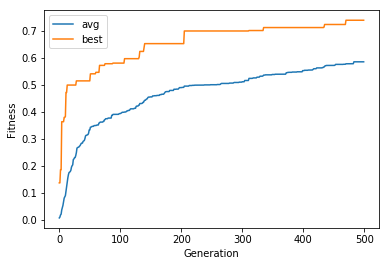

In [6]:
plt.plot(fpa.avg, label='avg')
plt.plot(fpa.bests, label='best')
plt.ylabel('Fitness')
plt.xlabel('Generation')
plt.legend()
plt.show()

In [7]:
solution = fpa.best[1]#get the parameter
best_fitness = fpa.best[0]#get the best fitness based on training data

print('best fitness' ,best_fitness)
print('mae score', mean_abs_error(fpa.best[1], X_test, y_test) ) 

best fitness 0.7394065929687285
mae score 0.34449272619863636
